In [1]:
#For classification
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

#For visualisation
import pprint
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import seaborn as sns

import pandas as pd

#To remove stopwords
import nltk
nltk.download("stopwords")

from nltk.corpus import stopwords
#Remove stopwords for easier parsing afterwards
stop_words = list(stopwords.words("english"))

df = pd.read_csv("../../data/abstract_dataset.csv",header=None)
df.columns = ["title","DOI","Abstract","Task"]
df

[nltk_data] Downloading package stopwords to /home/theo/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,title,DOI,Abstract,Task
0,nnU-Net: a self-configuring method for deep le...,10.1038/s41592-020-01008-z,biomedical imaging is a driver of scientific d...,Cardiac
1,Automated cardiovascular magnetic resonance im...,10.1186/s12968-018-0471-x,cardiovascular resonance cmr imaging is a stan...,Cardiac
2,Deep Learning for Cardiac Image Segmentation: ...,10.3389/fcvm.2020.00025,deep learning has become the most widely used ...,Cardiac
3,Deep Learning for Segmentation Using an Open L...,10.1109/tmi.2019.2900516,delineation of the cardiac structures from 2d ...,Cardiac
4,Multi-Scale Self-Guided Attention for Medical ...,10.1109/jbhi.2020.2986926,even though convolutional neural networks cnns...,Cardiac
...,...,...,...,...
3583,Multi-Agent Medical Image Segmentation: A Survey,10.1016/j.cmpb.2023.107444,during the last decades the healthcare area ha...,Brain
3584,Region-of-interest Attentive Heteromodal Varia...,10.1007/978-3-031-26351-4_9,abstractthe use of multimodal images generally...,Brain
3585,Large-Kernel Attention for 3D Medical Image Se...,10.1007/s12559-023-10126-7,abstract automated segmentation of multiple or...,Brain
3586,Efficient U-Net Architecture with Multiple Enc...,10.3390/diagnostics13050872,the brain is the center of human control and c...,Brain


## Data Analysis

### Task representation

<AxesSubplot: xlabel='count', ylabel='Task'>

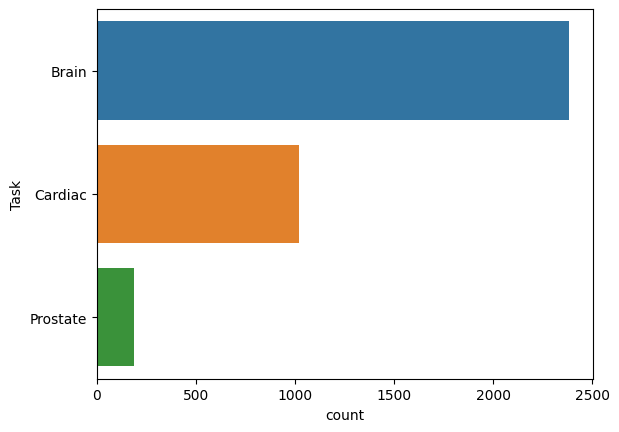

In [75]:
sns.countplot(data=df,y='Task',order=df["Task"].value_counts().index)

### Wordcloud per task without tf-idf

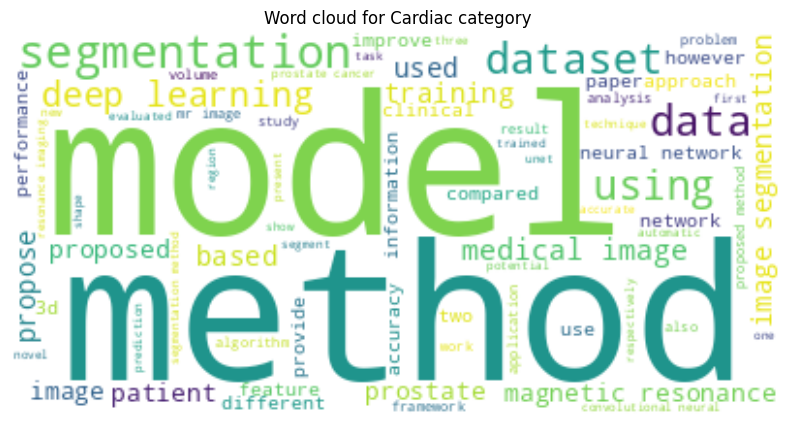

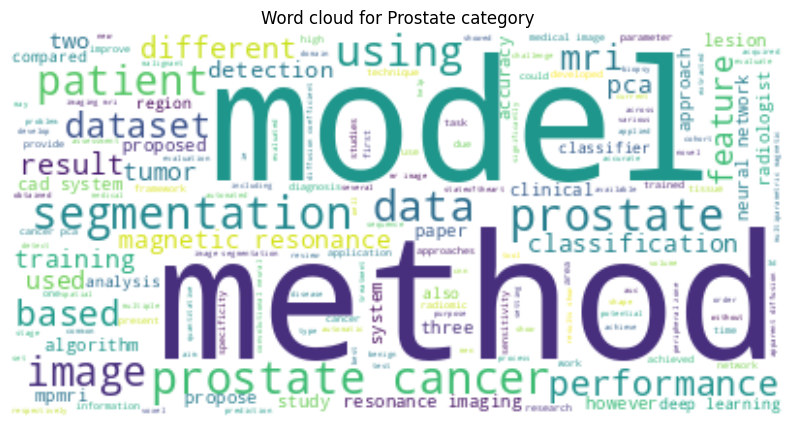

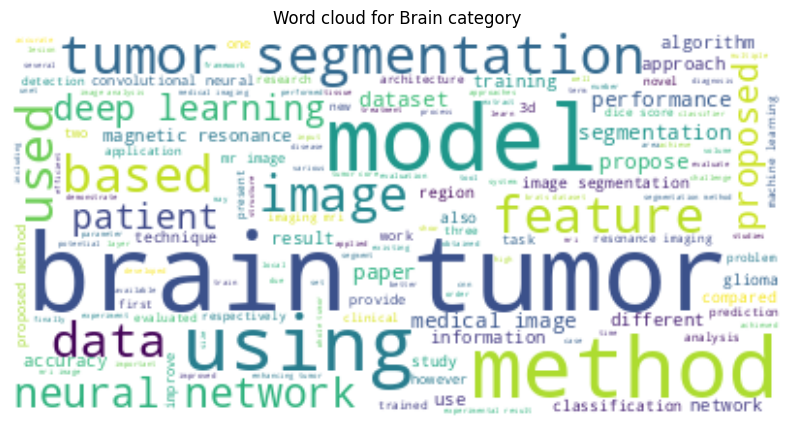

In [76]:
for task in df["Task"].unique():
    #Get text of the category
    task_df = df[df["Task"]==task]
    text =   ' '.join(task_df["Abstract"])

    #Plot
    wordcloud = WordCloud(stopwords=stop_words,background_color="white").generate(text)
    
    plt.figure(figsize=(10,10))
    plt.title(f"Word cloud for {task} category")
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")

### Wordcloud per task with tf-idf

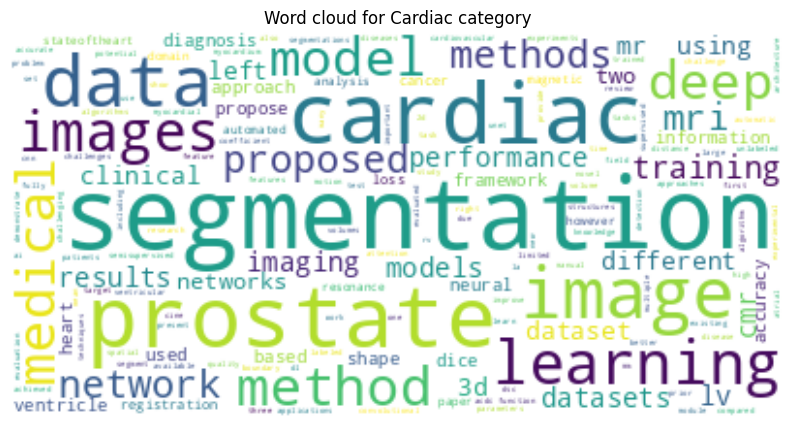

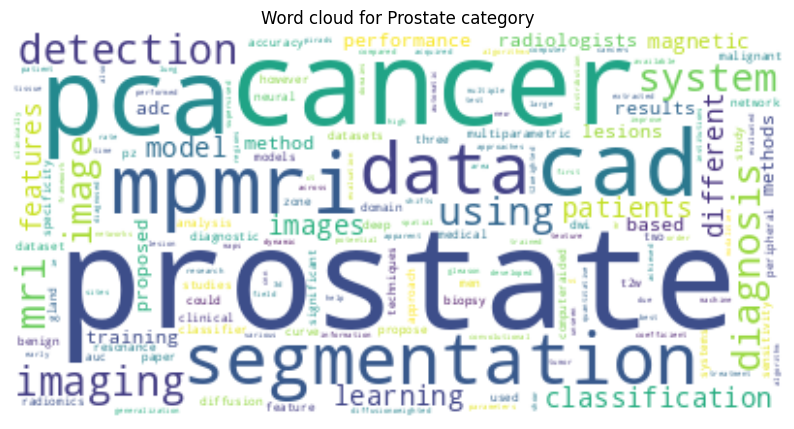

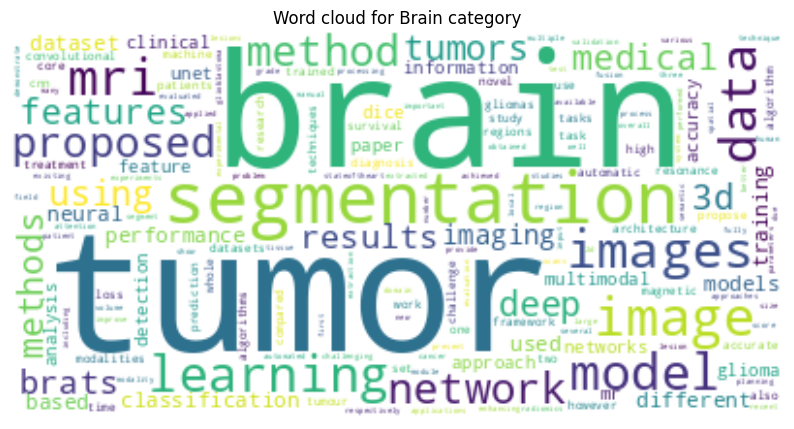

In [8]:
corpus = df["Abstract"].to_list()
vectorizer = TfidfVectorizer(stop_words=stop_words)
vecs = vectorizer.fit(corpus)
feature_names = vectorizer.get_feature_names_out()

for task in df["Task"].unique():
    #Get text of the category
    task_df = df[df["Task"]==task]
    corpus = task_df["Abstract"].to_list()
    vecs = vectorizer.transform(corpus)
    dense = vecs.todense()
    lst1 = dense.tolist()
    df_tf_idf = pd.DataFrame(lst1, columns=feature_names)

    x = df_tf_idf.T.sum(axis=1)
    #Plot
    wordcloud = WordCloud(stopwords=stop_words,background_color="white").generate_from_frequencies(x)
    
    plt.figure(figsize=(10,10))
    plt.title(f"Word cloud for {task} category")
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")

## Classification

In [9]:
train,test = train_test_split(df,test_size=0.2)
test,dev = train_test_split(test,test_size=0.5)

X_train = train["Abstract"].to_list()
X_dev = dev["Abstract"].to_list()
X_test = test["Abstract"].to_list()

y_train = train["Task"].to_list()
y_dev = dev["Task"].to_list()
y_test = test["Task"].to_list()

vectorizer = TfidfVectorizer(max_features=100,stop_words=stop_words)
vectorizer.fit(X_train)
X_train_tf = vectorizer.transform(X_train)
X_dev_tf = vectorizer.transform(X_dev)
X_test_tf = vectorizer.transform(X_test)


multiNB = MultinomialNB()
multiNB.fit(X_train_tf,y_train)
print(f"Train accuracy: {multiNB.score(X_dev_tf,y_dev)}")



Train accuracy: 0.8272980501392758


## Error Analysis

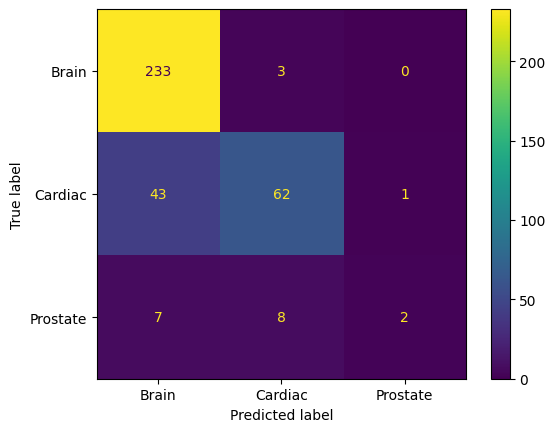

In [10]:
y_pred = multiNB.predict(X_dev_tf)

cm = confusion_matrix(y_dev,y_pred)
disp = ConfusionMatrixDisplay(cm,display_labels=multiNB.classes_)
disp.plot()